In [253]:
# import packages for analysis and modeling
import pandas as pd #data frame operations
import numpy as np #arrays and math functions
from scipy.stats import uniform #for training and test splits
import statsmodels.api as smf #R-like model specification
import matplotlib.pyplot as plt #2D plotting
import seaborn as sns
from sklearn.tree import export_graphviz 
from sklearn import tree
from IPython.display import Image  



import statsmodels.api as sm # statistical models (including regression)
import statsmodels.formula.api as smf # R-like model specification
import matplotlib.pyplot as plt # 2D plotting
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import scipy.stats as stats


import requests

import lxml.html as lh

import pandas as pd


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [248]:
#conda install -c conda-forge pydotplus
import pydotplus

In [2]:


# read in Coaches data and create data frame

Coaches = pd.read_csv("coaches9.csv")

print(pd.DataFrame.head(Coaches))

Coaches.describe()

Coaches.columns


                  School Conference              Coach    SchoolPay  \
0              Air Force   Mt. West       Troy Calhoun       885000   
1                  Akron        MAC       Terry Bowden    $411,000    
2                Alabama        SEC         Nick Saban  $8,307,000    
3  Alabama at Birmingham      C-USA         Bill Clark    $900,000    
4      Appalachian State   Sun Belt  Scott Satterfield    $712,500    

      TotalPay        Bonus  BonusPaid AssistantPay        Buyout  
0       885000       247000         --          $0             --  
1    $412,500     $225,000    $50,000           $0      $688,500   
2  $8,307,000   $1,100,000   $500,000           $0   $33,600,000   
3    $900,000     $950,000   $165,471           $0    $3,847,500   
4    $712,500     $295,000   $145,000           $0    $2,160,417   


Index(['School', 'Conference', 'Coach', 'SchoolPay', 'TotalPay', 'Bonus',
       'BonusPaid', 'AssistantPay', 'Buyout'],
      dtype='object')

In [3]:
Coaches.columns

Index(['School', 'Conference', 'Coach', 'SchoolPay', 'TotalPay', 'Bonus',
       'BonusPaid', 'AssistantPay', 'Buyout'],
      dtype='object')

In [4]:
import platform

print('Python is ' + platform.python_version())

pd.show_versions(as_json=False)

Python is 3.7.4

INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 0.25.1
numpy            : 1.16.5
pytz             : 2019.3
dateutil         : 2.8.0
pip              : 19.2.3
setuptools       : 41.4.0
Cython           : 0.29.13
pytest           : 5.2.1
hypothesis       : None
sphinx           : 2.2.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.1
lxml.etree       : 4.4.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.8.0
pandas_datareader: None
bs4              : 4.8.0
bottleneck       : 1.2.1
fastparquet      : None
gcsfs            : None
lxml.etree      

In [5]:
#inspect and cast variables to right types
Coaches.dtypes
Coaches.iloc[:,3:]

,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,885000,885000,247000,--,$0,--
1,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"
...,...,...,...,...,...,...
124,"$3,605,000","$3,617,500","$1,000,000","$90,000",$0,"$7,150,000"
125,"$800,000","$805,850","$400,000",$0,$0,"$1,200,000"
126,"$800,000","$800,000","$346,500","$39,250",$0,"$800,000"
127,"$3,750,000","$3,750,000",--,"$290,000",$0,"$6,000,000"


In [6]:
#set up a function for cleaning

def clean_money_col(x):
    x = x.str.replace("$","")
    x = x.str.replace(',','')
    return x

In [7]:
# use money cleaning function
Coaches.iloc[:,3:] = Coaches.iloc[:,3:].apply(lambda x: clean_money_col(x))

In [8]:
# drop columns
#DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)

Coaches.columns

Index(['School', 'Conference', 'Coach', 'SchoolPay', 'TotalPay', 'Bonus',
       'BonusPaid', 'AssistantPay', 'Buyout'],
      dtype='object')

In [9]:
Coaches.dropna(how='any', inplace=True)

In [10]:
Coaches.shape

Coaches.drop(columns=['AssistantPay','Buyout','BonusPaid','Bonus','Coach'],axis=1, inplace=True)

#DataFrame.drop(self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

In [11]:
Coaches['SchoolPay'] = pd.to_numeric(Coaches['SchoolPay'],errors='coerce')
Coaches['TotalPay'] = pd.to_numeric(Coaches['TotalPay'],errors='coerce')




In [12]:
Coaches.shape
Coaches.head(20)
# missing values will prevet casting to 



,School,Conference,SchoolPay,TotalPay
0,Air Force,Mt. West,885000.0,885000.0
1,Akron,MAC,411000.0,412500.0
2,Alabama,SEC,8307000.0,8307000.0
3,Alabama at Birmingham,C-USA,900000.0,900000.0
4,Appalachian State,Sun Belt,712500.0,712500.0
5,Arizona,Pac-12,1600000.0,2000000.0
6,Arizona State,Pac-12,2000000.0,2000000.0
7,Arkansas,SEC,3500000.0,3500000.0
8,Arkansas State,Sun Belt,825000.0,825000.0
9,Army,Ind.,932521.0,932521.0


In [13]:
#### load in the other data to merge with.
#### start with stadium size
# https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_stadiums

# url

url_stad = 'https://en.wikipedia.org/wiki/List_of_NCAA_Division_I_FBS_football_stadiums'

# put the requests into page variable


page = requests.get(url_stad)
#Store the contents of the website under doc

doc = lh.fromstring(page.content) # put web document into doc var

#put elements in the table rows <tr> ... </tr> into variable 
tr_elements = doc.xpath('//tr') # list of table rows
#### create a list of tuples to convert into a data frame later

tr_elements = doc.xpath('//tr')
# list of tuples structure. each tuple has a list that will have our info
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

len(col) # 11 places
type(col[0])

1:"Image"
2:"Stadium"
3:"City"
4:"State"
5:"Team"
6:"Conference"
7:"Capacity"
8:"Record1"
9:"Built"
10:"Expanded 2"
11:"Surface
"


tuple

In [14]:
# loop to put information inside the lists in the tuples

for j in range(1, len(tr_elements)):
    i = 0
    T = tr_elements[j] # element of tr = table row containing 11 columns
    for t in T.iterchildren():
        data = t.text_content()
        col[i][1].append(data)
        i += 1
        
       

In [15]:
# put into dictionary then data frame
Dict = {title:column for (title,column) in col}
Dict.keys()

dict_keys(['Image', 'Stadium', 'City', 'State', 'Team', 'Conference', 'Capacity', 'Record1', 'Built', 'Expanded 2', 'Surface\n'])

In [16]:
# remove useless columns that have missing data

del Dict['Image']
del Dict['Stadium']
del Dict['City']
del Dict['State']
del Dict['Conference']
del Dict['Record1']
del Dict['Built']
del Dict['Expanded 2']
del Dict['Surface\n']
Stad_Size = pd.DataFrame(Dict)

In [17]:
Stad_Size.head(5)

,Team,Capacity
0,New Mexico State\n,"30,343[1]\n"
1,UTSA\n,"65,000\n"
2,Washington\n,"70,500[2]\n"
3,Boise State\n,"36,387[3]\n"
4,Georgia Southern\n,"25,000\n"


In [18]:
# clean the data frame

# regex remove data  after [
Stad_Size['Capacity'] = Stad_Size['Capacity'].str.replace(r"\[.+","")
# remove commas from capacity numbers
Stad_Size['Capacity'] = Stad_Size['Capacity'].str.replace(',','')
# remove \n in both columns
Stad_Size = Stad_Size.apply(lambda x: x.str.replace('\n',""))
#check out dataframe
Stad_Size.head(130)
#looks like we have all the teams
Stad_Size.tail(10)

Stad_Size.dtypes
#remove the last useless rows
Stad_Size = Stad_Size.iloc[0:130,]
# change data type to float
Stad_Size['Capacity'] = Stad_Size['Capacity'].astype('float')
Stad_Size.rename(columns={'Capacity':'StadSize'}, inplace=True)
Stad_Size.rename(columns={'Team':'School'}, inplace=True)
Stad_Size

,School,StadSize
0,New Mexico State,30343.0
1,UTSA,65000.0
2,Washington,70500.0
3,Boise State,36387.0
4,Georgia Southern,25000.0
...,...,...
125,Troy,30402.0
126,Western Michigan,30200.0
127,UMass,17000.0
128,NC State,57583.0


In [19]:
# merge data sets
Coaches = Coaches.merge(Stad_Size, how="left", on="School")
Coaches.head(5)


,School,Conference,SchoolPay,TotalPay,StadSize
0,Air Force,Mt. West,885000.0,885000.0,46692.0
1,Akron,MAC,411000.0,412500.0,30000.0
2,Alabama,SEC,8307000.0,8307000.0,101821.0
3,Alabama at Birmingham,C-USA,900000.0,900000.0,NaN
4,Appalachian State,Sun Belt,712500.0,712500.0,30000.0


In [20]:
### load in the table from http://sports.usatoday.com/ncaa/finances/

#save in text file  for ease of access

#it could be scraped  like above or with other modules

# import total revenue


sports_revenue = pd.read_table('schools_revenue.txt', sep='\t',  index_col=False,)

# drop unneccesary columns


sports_revenue.drop(columns=['rank','conf','total_exp','total_all','total_per_all'],axis=1, inplace=True)

sports_revenue.head(10) # 2017-2018 finances

sports_revenue.rename(columns={'team':'School'}, inplace=True)

In [21]:
#merge the data sets together

Coaches = Coaches.merge(sports_revenue, how="left", on="School")

In [22]:
Coaches.head(30)

,School,Conference,SchoolPay,TotalPay,StadSize,total_rev
0,Air Force,Mt. West,885000.0,885000.0,46692.0,"$60,101,907"
1,Akron,MAC,411000.0,412500.0,30000.0,"$34,601,000"
2,Alabama,SEC,8307000.0,8307000.0,101821.0,"$177,481,937"
3,Alabama at Birmingham,C-USA,900000.0,900000.0,NaN,"$34,736,287"
4,Appalachian State,Sun Belt,712500.0,712500.0,30000.0,"$36,940,867"
5,Arizona,Pac-12,1600000.0,2000000.0,56029.0,"$95,867,717"
6,Arizona State,Pac-12,2000000.0,2000000.0,56232.0,"$113,636,755"
7,Arkansas,SEC,3500000.0,3500000.0,80000.0,"$130,126,110"
8,Arkansas State,Sun Belt,825000.0,825000.0,30964.0,"$40,098,989"
9,Army,Ind.,932521.0,932521.0,38000.0,NaN


In [23]:

#clean  total_rev



In [24]:
#Coaches.loc['School'] == 'Syracuse'

Coaches.loc[Coaches['School'] == 'Syracuse']

,School,Conference,SchoolPay,TotalPay,StadSize,total_rev
102,Syracuse,ACC,2401206.0,2401206.0,49250.0,NaN


In [25]:
# index 102
#91.4 from a year before the rest of the data
# estimate syracuse sports revenue
# https://www.syracuse.com/orangesports/2018/02/syracuse_athletics_reports_record_revenues_how_much_does_su_spend_on_each_sport.html
# update the data point since Syracuse is private in this regard

Coaches.at[102,'total_rev']= '$95,000,000'

In [26]:
Coaches1 = Coaches.copy()


Coaches1.dropna(axis=0,how="any", inplace=True)

In [27]:
#DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)


Coaches1.shape  # only 94 obserations left




(94, 6)

In [28]:
Coaches1.dtypes




Coaches1.iloc[:,5:] = Coaches.iloc[:,5:].apply(lambda x: clean_money_col(x))




#Coaches1['total_rev'] = Coaches1['total_rev'].apply(lambda x: clean_money_col(x))

In [29]:
Coaches1.head(10)

,School,Conference,SchoolPay,TotalPay,StadSize,total_rev
0,Air Force,Mt. West,885000.0,885000.0,46692.0,60101907
1,Akron,MAC,411000.0,412500.0,30000.0,34601000
2,Alabama,SEC,8307000.0,8307000.0,101821.0,177481937
4,Appalachian State,Sun Belt,712500.0,712500.0,30000.0,36940867
5,Arizona,Pac-12,1600000.0,2000000.0,56029.0,95867717
6,Arizona State,Pac-12,2000000.0,2000000.0,56232.0,113636755
7,Arkansas,SEC,3500000.0,3500000.0,80000.0,130126110
8,Arkansas State,Sun Belt,825000.0,825000.0,30964.0,40098989
10,Auburn,SEC,6700000.0,6705656.0,87451.0,147620569
11,Ball State,MAC,435689.0,435689.0,22500.0,28634103


In [30]:
Coaches1['School'].apply(lambda x: print(x))

Air Force
Akron
Alabama
Appalachian State
Arizona
Arizona State
Arkansas
Arkansas State
Auburn
Ball State
Boise State
Bowling Green
Buffalo
California
Central Michigan
Charlotte
Cincinnati
Clemson
Coastal Carolina
Colorado
Colorado State
East Carolina
Eastern Michigan
Florida
Florida Atlantic
Florida State
Fresno State
Georgia
Georgia Southern
Georgia State
Georgia Tech
Houston
Illinois
Indiana
Iowa
Iowa State
Kansas
Kansas State
Kent State
Kentucky
Louisiana Tech
Louisiana-Monroe
Louisville
LSU
Marshall
Maryland
Memphis
Michigan
Michigan State
Middle Tennessee
Minnesota
Mississippi
Mississippi State
Missouri
Nebraska
Nevada
New Mexico
New Mexico State
North Carolina
North Texas
Ohio
Ohio State
Oklahoma
Oklahoma State
Old Dominion
Oregon
Oregon State
Penn State
Purdue
Rutgers
San Diego State
San Jose State
South Alabama
South Carolina
Syracuse
Tennessee
Texas
Texas A&M
Texas State
Texas Tech
Toledo
Troy
UCLA
Utah
Utah State
Virginia
Virginia Tech
Washington
Washington State
West Virgin

0      None
1      None
2      None
4      None
5      None
       ... 
124    None
125    None
126    None
127    None
128    None
Name: School, Length: 94, dtype: object

In [31]:
## import GSR data 

GSR_2018 = pd.read_csv('GSR_2018.csv')
GSR_2018.columns
GSR_2018.SCL_CONFERENCE.unique()


Conferences = ['Mountain West Conference','Mid-American Conference', 'Southeastern Conference', 'Sun Belt Conference',
               'Pac-12 Conference', 'Big 12 Conference','Atlantic Coast Conference','American Athletic Conference'
               ,'Conference USA','Big Ten Conference']


GSR_2018= GSR_2018[GSR_2018['SCL_CONFERENCE'].isin(Conferences)]

# keep only football and division 1 football sub division
GSR_2018 = GSR_2018[(GSR_2018.SPORT == 'MFB') & (GSR_2018.SCL_SUBDIVISION == 1)]

GSR_2018
GSR_2018.shape # left with 129 teams


GSR_2018.rename(columns={'SCL_NAME': 'School', 'FED_RATE': 'FGR18', 'GSR': 'GSR18'}, inplace=True)

In [32]:

GSR = GSR_2018[['School', 'FGR18','GSR18']]

In [33]:
def  special_names(name):
    if name == 'University of California, Berkeley':
        name = 'California'

    elif name == 'Virginia Polytechnic Institute and State University':
        name = "Virginia Tech"

    elif name == "Bowling Green State University":
        name = "Bowling Green"

    elif name == 'Georgia Institute of Technology':
        name = 'Georgia Tech'

    elif name == 'University of Southern California':
        name = 'USC'
    elif name == 'University of Illinois Urbana-Champaign':
        name = 'Illinois'
    elif name == 'University of Nevada, Reno':
        name = 'Nevada'
    elif name =='Southern Methodist University':
        name = "SMU"
    elif name == 'California State University, Fresno':
        name = 'Fresno State'
    elif name == 'Pennsylvania State':
        name = 'Penn State'
    else:
        pass
    return name




df = GSR[['School', 'FGR18','GSR18']]

df['School'] = df['School'].apply(lambda x: special_names(x))


df[['School']] = df[['School']].apply(lambda x: x.str.replace('University',''))
df[['School']] = df[['School']].apply(lambda x: x.str.replace('of',''))
df[['School']] = df[['School']].apply(lambda x: x.str.replace('at',''))
df[['School']] = df[['School']].apply(lambda x: x.str.replace('The',''))
df[['School']] = df[['School']].apply(lambda x: x.str.replace('the',''))
df[['School']] = df[['School']].apply(lambda x: x.str.replace('Academy',''))

df[['School']] = df[['School']].apply(lambda x: x.str.replace('Ste','State'))

df[['School']] = df[['School']].apply(lambda x: x.str.replace('U.S.',''))


df['School'].apply(lambda x: print(x))
df1 = df.copy()
df1['School'] = df1['School'].str.strip()
df1['School'].apply(lambda x: print(x))

def extract_name(column):
    return column.split(',',1)[0]

df1['School'] = df1['School'].apply(extract_name)
print("\n \n \n")
df1['School'].apply(lambda x: print(x))

  Alabama  Birmingham
  Alabama
Auburn 
  South Alabama
Troy 
Arizona State 
  Arizona
  Arkansas, Fayetteville
Arkansas State 
Fresno State
California
  California, Los Angeles
San Diego State 
San Jose State 
USC
  Colorado, Boulder
Colorado State 
 Air Force 
  Connecticut
  Central Florida
Florida Atlantic 
Florida Internional 
Florida State 
  Florida
  Miami (Florida)
  South Florida
Georgia Tech
Georgia Sourn 
Georgia State 
  Georgia
Boise State 
Illinois
Norrn Illinois 
Northwestern 
Ball State 
Indiana , Bloomington
  Notre Dame
Iowa State 
  Iowa
  Kansas
Kansas State 
  Kentucky
  Louisville
Western Kentucky 
Louisiana State 
Louisiana Tech 
  Louisiana  Monroe
  Louisiana  Lafayette
Tulane 
  Maryland, College Park
Boston College
Central Michigan 
Eastern Michigan 
  Michigan
Michigan State 
Western Michigan 
  Minnesota, Twin Cities
  Mississippi
Mississippi State 
   Sourn Mississippi
  Missouri, Columbia
  Nebraska, Lincoln
  Nevada, Las Vegas
Nevada
Rutgers,  State   N

18      None
51      None
71      None
106     None
123     None
        ... 
5255    None
5301    None
5325    None
5358    None
5370    None
Name: School, Length: 122, dtype: object

In [34]:

Coaches = Coaches.merge(df1, how="left", on="School")

In [35]:
Coaches.shape

(131, 8)

In [36]:
Coaches.head(10)

,School,Conference,SchoolPay,TotalPay,StadSize,total_rev,FGR18,GSR18
0,Air Force,Mt. West,885000.0,885000.0,46692.0,"$60,101,907",NaN,77.0
1,Akron,MAC,411000.0,412500.0,30000.0,"$34,601,000",61.0,72.0
2,Alabama,SEC,8307000.0,8307000.0,101821.0,"$177,481,937",63.0,84.0
3,Alabama at Birmingham,C-USA,900000.0,900000.0,NaN,"$34,736,287",NaN,NaN
4,Appalachian State,Sun Belt,712500.0,712500.0,30000.0,"$36,940,867",67.0,71.0
5,Arizona,Pac-12,1600000.0,2000000.0,56029.0,"$95,867,717",63.0,76.0
6,Arizona State,Pac-12,2000000.0,2000000.0,56232.0,"$113,636,755",61.0,73.0
7,Arkansas,SEC,3500000.0,3500000.0,80000.0,"$130,126,110",42.0,56.0
8,Arkansas State,Sun Belt,825000.0,825000.0,30964.0,"$40,098,989",68.0,83.0
9,Army,Ind.,932521.0,932521.0,38000.0,NaN,NaN,NaN


In [37]:
### obtain the rest of the data to be used

# load in win/loss data set from 2018
# comes from  https://www.sports-reference.com/cfb/years/2018-standings.html

# set column names

columns = ['Rk','School','Conf','W','L','Pct','W1','L1','Pct1','Off','Def','SRS','SOS','AP Pre','AP High','AP1' 'Rank','Notes']

records = pd.read_csv('win_loss2018.csv', names = columns) 

# rename W column to W18 for successful merge of data

records.rename(columns={'W':'W18', 'L':'L18' }, inplace=True)


# merge W18/L18 into Coaches

#subset the information we want
records_wins18_losses18 = records[['School','W18','L18']]

#merge with the coaches data



Coaches = Coaches.merge(records_wins18_losses18, how="left" ,on="School")
print(Coaches.columns)

Index(['School', 'Conference', 'SchoolPay', 'TotalPay', 'StadSize',
       'total_rev', 'FGR18', 'GSR18', 'W18', 'L18'],
      dtype='object')


In [38]:
#load in salaries from 2012 which is the last year of Big East conference
# this gives us insight for the question what would Syracuse Coach's salary be if Syracuse was still in Big East

# go to this website. copy paste into a txt file
# https://www.usatoday.com/story/sports/ncaaf/2012/11/19/ncaa-college-football-head-coach-salary-database/1715543/


Big_East = pd.read_table('salary.txt', sep='\t',  index_col=False,names=('Coach', 'School', 'Conference','Salary', 'Other_Pay','Total_Pay','Max_Bonus'))

In [39]:
# clean big east data

# clean up the Big_East data set

#get rid of $ and commas

Big_East[Big_East.columns[1:]] = Big_East[Big_East.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',',''))

# turn numbers into floats
Big_East[Big_East.columns[3:]] = Big_East[Big_East.columns[3:]].astype(float)

#subset the data

Big_East_Teams = Big_East[Big_East['Conference']== 'Big East']

#chect the data set

Big_East_Teams.head(5)

# create list of teams to use as boolean indexing
Teams_in_Big_East_List = ['Cincinnati', 'Connecticut', 'Louisville', 'Pittsburgh', 'Rutgers', 'South Florida', 'Syracuse', 'Temple']



In [40]:
Coaches.head(10)

,School,Conference,SchoolPay,TotalPay,StadSize,total_rev,FGR18,GSR18,W18,L18
0,Air Force,Mt. West,885000.0,885000.0,46692.0,"$60,101,907",NaN,77.0,5.0,7.0
1,Akron,MAC,411000.0,412500.0,30000.0,"$34,601,000",61.0,72.0,4.0,8.0
2,Alabama,SEC,8307000.0,8307000.0,101821.0,"$177,481,937",63.0,84.0,14.0,1.0
3,Alabama at Birmingham,C-USA,900000.0,900000.0,NaN,"$34,736,287",NaN,NaN,NaN,NaN
4,Appalachian State,Sun Belt,712500.0,712500.0,30000.0,"$36,940,867",67.0,71.0,11.0,2.0
5,Arizona,Pac-12,1600000.0,2000000.0,56029.0,"$95,867,717",63.0,76.0,5.0,7.0
6,Arizona State,Pac-12,2000000.0,2000000.0,56232.0,"$113,636,755",61.0,73.0,7.0,6.0
7,Arkansas,SEC,3500000.0,3500000.0,80000.0,"$130,126,110",42.0,56.0,2.0,10.0
8,Arkansas State,Sun Belt,825000.0,825000.0,30964.0,"$40,098,989",68.0,83.0,8.0,5.0
9,Army,Ind.,932521.0,932521.0,38000.0,NaN,NaN,NaN,11.0,2.0


In [41]:
Coaches[['total_rev']] = Coaches[['total_rev']].apply(lambda x: clean_money_col(x)) # two brackets to work around str to str error

In [42]:
Coaches.head(10)

,School,Conference,SchoolPay,TotalPay,StadSize,total_rev,FGR18,GSR18,W18,L18
0,Air Force,Mt. West,885000.0,885000.0,46692.0,60101907,NaN,77.0,5.0,7.0
1,Akron,MAC,411000.0,412500.0,30000.0,34601000,61.0,72.0,4.0,8.0
2,Alabama,SEC,8307000.0,8307000.0,101821.0,177481937,63.0,84.0,14.0,1.0
3,Alabama at Birmingham,C-USA,900000.0,900000.0,NaN,34736287,NaN,NaN,NaN,NaN
4,Appalachian State,Sun Belt,712500.0,712500.0,30000.0,36940867,67.0,71.0,11.0,2.0
5,Arizona,Pac-12,1600000.0,2000000.0,56029.0,95867717,63.0,76.0,5.0,7.0
6,Arizona State,Pac-12,2000000.0,2000000.0,56232.0,113636755,61.0,73.0,7.0,6.0
7,Arkansas,SEC,3500000.0,3500000.0,80000.0,130126110,42.0,56.0,2.0,10.0
8,Arkansas State,Sun Belt,825000.0,825000.0,30964.0,40098989,68.0,83.0,8.0,5.0
9,Army,Ind.,932521.0,932521.0,38000.0,NaN,NaN,NaN,11.0,2.0


In [43]:
Coaches['total_rev'] = pd.to_numeric(Coaches['total_rev'],errors='coerce')

In [44]:
Coaches.dtypes #columns have data types needed

School         object
Conference     object
SchoolPay     float64
TotalPay      float64
StadSize      float64
total_rev     float64
FGR18         float64
GSR18         float64
W18           float64
L18           float64
dtype: object

In [45]:
Coaches1 = Coaches.copy()

In [46]:
Coaches[0:2]

#Coaches[0:2]["School"]

Big_East_Index = Coaches1[Coaches1["School"].isin(Teams_in_Big_East_List)]

In [47]:
Coaches1.loc[Coaches1.School.isin(Teams_in_Big_East_List), ['Conference']] == 'Big East' # not in Big East

,Conference
23,False
28,False
55,False
91,False
94,False
99,False
104,False


In [48]:
Coaches1.loc[Coaches1.School.isin(Teams_in_Big_East_List), ['Conference']] = 'Big East'

In [49]:
Coaches1.loc[Coaches1.School.isin(Teams_in_Big_East_List)]

,School,Conference,SchoolPay,TotalPay,StadSize,total_rev,FGR18,GSR18,W18,L18
23,Cincinnati,Big East,2000000.0,2000000.0,40000.0,61778960.0,NaN,NaN,11.0,2.0
28,Connecticut,Big East,1100000.0,1100000.0,NaN,79308421.0,68.0,79.0,1.0,11.0
55,Louisville,Big East,3980434.0,3980434.0,61000.0,134155908.0,77.0,86.0,2.0,10.0
91,Pittsburgh,Big East,3017718.0,3017718.0,68400.0,NaN,49.0,75.0,NaN,NaN
94,Rutgers,Big East,2200000.0,2200000.0,52454.0,100745386.0,55.0,78.0,1.0,11.0
99,South Florida,Big East,1000000.0,1000000.0,NaN,45556113.0,72.0,76.0,7.0,6.0
104,Syracuse,Big East,2401206.0,2401206.0,49250.0,95000000.0,70.0,85.0,10.0,3.0


In [50]:
Coaches1[Coaches1['School'] == 'Syracuse'] # put into big east

,School,Conference,SchoolPay,TotalPay,StadSize,total_rev,FGR18,GSR18,W18,L18
104,Syracuse,Big East,2401206.0,2401206.0,49250.0,95000000.0,70.0,85.0,10.0,3.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

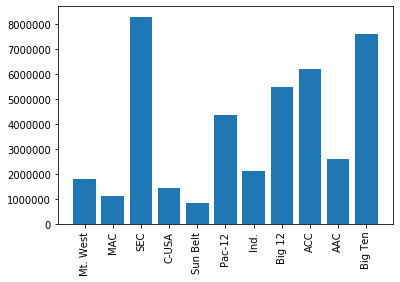

In [51]:
# explore the data




# clean coaches data
Coaches['Conference'] = Coaches['Conference'].astype('category')

# make a plot for eda

graph = plt.bar(Coaches.Conference, Coaches.SchoolPay)
plt.xticks(rotation='vertical')

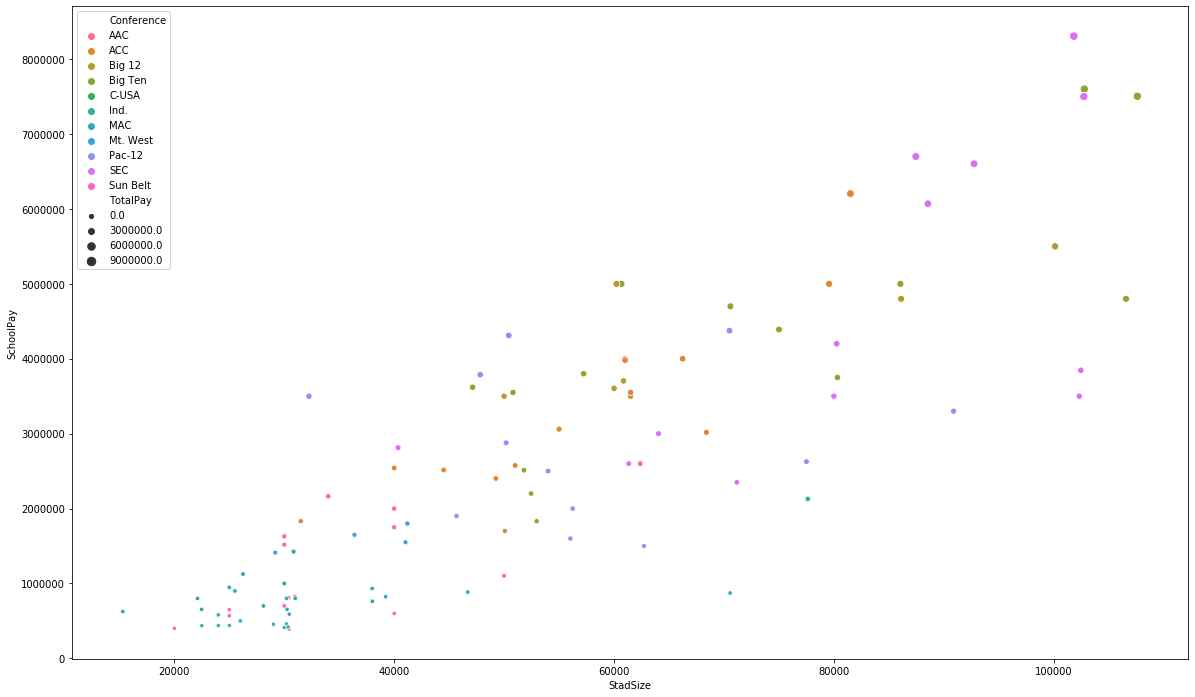

In [52]:
## view stadium size and relationship to pay

plt.figure(figsize=(20, 12))
sns.scatterplot(Coaches.StadSize, Coaches.SchoolPay, hue = Coaches.Conference, size = Coaches.TotalPay)              
plt.show();

# add plt.figure(figsize=(#,#))

C:\Users\dread\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\dread\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\dread\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


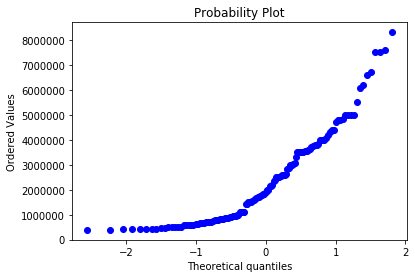

,SchoolPay,TotalPay,StadSize,total_rev,FGR18,GSR18,W18,L18
SchoolPay,1,0.999695,0.849821,0.910216,-0.0163639,0.124214,0.388893,-0.358669
TotalPay,0.999695,1,0.849952,0.909586,-0.0150057,0.125317,0.39116,-0.36072
StadSize,0.849821,0.849952,1,0.928566,-0.055264,0.0497583,0.313537,-0.288902
total_rev,0.910216,0.909586,0.928566,1,-0.0120013,0.126384,0.289698,-0.271319
FGR18,-0.0163639,-0.0150057,-0.055264,-0.0120013,1,0.784441,0.0680294,-0.0532424
GSR18,0.124214,0.125317,0.0497583,0.126384,0.784441,1,0.231005,-0.209198
W18,0.388893,0.39116,0.313537,0.289698,0.0680294,0.231005,1,-0.984198
L18,-0.358669,-0.36072,-0.288902,-0.271319,-0.0532424,-0.209198,-0.984198,1


In [53]:
stats.probplot(Coaches.SchoolPay, dist="norm", plot=plt)

plt.show()

# it appears we do not have a normally distributed salary of coaches

corr = Coaches.corr()

corr.style.background_gradient(cmap='coolwarm')

#check for auto correlation

# we have lot of highly correlated variables

# we will need to consult this before making any predictions

# we can make a log transformation for our next test to help cope with the problem of linearity.


#How to fix: consider applying a nonlinear transformation to the dependent and/or independent variables if you can think of a transformation that seems appropriate. 
#the log transformation is an option. 

In [54]:
#### predict the salaries

#What is the recommended salary for the Syracuse football coach?

results = smf.ols('SchoolPay ~ Conference + W18 + GSR18 + StadSize', data = Coaches).fit()

In [55]:
##### This model accounts for 81% of the variance in the data

#### This model used what conference the team is in, the amount of wins from 2018, graduation rates,
#### and stadium size to predict salary.

#### Graduation Rates did not seem to be a significant variable in our model.
#### The Big Ten and indepedent conference seem to be significant important conferences the rest
#### are no significant predictors in our model.
### Stadium Size and wins from 2018 seem to be significant predictors.
### our model says each win adds around $129,000 to a salary. at most this would add  $1.935 million
### this doesn't seem too realistic as some smaller schools can get 7 wins and their salary is still
### going to be similar to other small schools
### Our Durbin-Watson value is going to be slightly low meaning that our predicor variable are related
### to one another in a slightly positive manner
###


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     30.22
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           1.50e-24
Time:                        20:04:09   Log-Likelihood:                -1331.2
No. Observations:                  89   AIC:                             2690.
Df Residuals:                      75   BIC:                             2725.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -7.47


 This scatter plot shows us the patterns to see if heteroscedasticity is a problem. I don't think it it too bad here


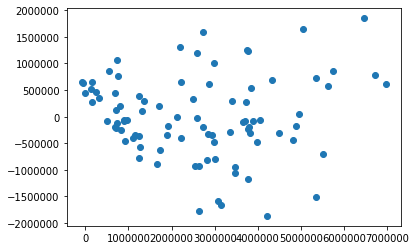

In [56]:
results.resid


plt.scatter(results.fittedvalues, results.resid)

print("\n This scatter plot shows us the patterns to see if heteroscedasticity is a problem. I don't think it it too bad here")

In [57]:
Coaches.columns

Index(['School', 'Conference', 'SchoolPay', 'TotalPay', 'StadSize',
       'total_rev', 'FGR18', 'GSR18', 'W18', 'L18'],
      dtype='object')

In [58]:
#### a log transformation will be made on our variables




Coaches['StadSize'] = np.log(Coaches['StadSize'])

Coaches['SchoolPay'] = np.log(Coaches['SchoolPay'])
Coaches['total_rev'] = np.log(Coaches['total_rev'])


#results = smf.ols('SchoolPay ~ Conf + W + GSR + StadSize', data = Coaches).fit()

((array([-2.55711433, -2.23198959, -2.04514661, -1.9105288 , -1.80362625,
         -1.71407652, -1.63647876, -1.56764423, -1.50552584, -1.44872751,
         -1.39625257, -1.34736345, -1.30149826, -1.25821858, -1.21717544,
         -1.17808624, -1.14071875, -1.10487966, -1.07040624, -1.0371601 ,
         -1.00502252, -0.9738908 , -0.94367546, -0.91429802, -0.88568921,
         -0.85778756, -0.83053824, -0.8038921 , -0.77780488, -0.75223657,
         -0.72715084, -0.70251458, -0.67829752, -0.6544719 , -0.63101215,
         -0.60789467, -0.5850976 , -0.56260065, -0.54038492, -0.51843277,
         -0.49672766, -0.4752541 , -0.4539975 , -0.4329441 , -0.41208089,
         -0.39139554, -0.37087633, -0.35051211, -0.33029224, -0.31020652,
         -0.29024519, -0.27039885, -0.25065846, -0.23101528, -0.21146084,
         -0.19198693, -0.17258556, -0.15324895, -0.13396948, -0.11473967,
         -0.09555221, -0.07639986, -0.0572755 , -0.03817207, -0.01908256,
          0.        ,  0.01908256,  0.

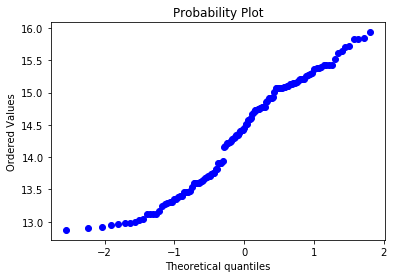

In [59]:
# this shows our linearity is much better with a log transformation.
stats.probplot(Coaches.SchoolPay, dist="norm", plot=plt)

In [60]:
results = smf.ols('SchoolPay ~ Conference + W18 + StadSize + total_rev', data=Coaches).fit()
print(results.summary())

### This model accounts for 89% of the variance using Adj. R-squared. The Durbin-Watson is slightly low.


                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     59.46
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           3.07e-35
Time:                        20:04:14   Log-Likelihood:                -10.559
No. Observations:                  93   AIC:                             49.12
Df Residuals:                      79   BIC:                             84.58
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [61]:
results = smf.ols('SchoolPay ~ + Conference + total_rev', data=Coaches).fit()
print(results.summary())


# this is a very simple model that can be used to make decisins quite easily
# look at what conference a team is in ,here the ACC then look at total revenue their program made for the data collected,
# This goes without performance. THe Durbin-Watson is even better than the other ones.

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     67.55
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           5.66e-41
Time:                        20:04:15   Log-Likelihood:                -25.930
No. Observations:                 111   AIC:                             75.86
Df Residuals:                      99   BIC:                             108.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [62]:
Coaches.columns

Index(['School', 'Conference', 'SchoolPay', 'TotalPay', 'StadSize',
       'total_rev', 'FGR18', 'GSR18', 'W18', 'L18'],
      dtype='object')

In [63]:
### Here we will break the data up into test and train sets

np.random.seed(111)
Coaches['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(Coaches))
Coaches_train = Coaches[Coaches['runiform'] >= 0.33]
Coaches_test = Coaches[Coaches['runiform'] < 0.33]
print(Coaches_test.head(5))

              School Conference  SchoolPay   TotalPay   StadSize  total_rev  \
1              Akron        MAC  12.926348   412500.0  10.308953  17.359393   
4  Appalachian State   Sun Belt  13.476535   712500.0  10.308953  17.424829   
5            Arizona     Pac-12  14.285514  2000000.0  10.933625  18.378480   
6      Arizona State     Pac-12  14.508658  2000000.0  10.937241  18.548518   
8     Arkansas State   Sun Belt  13.623139   825000.0  10.340581  17.506862   

   FGR18  GSR18   W18  L18  runiform  
1   61.0   72.0   4.0  8.0  0.169070  
4   67.0   71.0  11.0  2.0  0.295325  
5   63.0   76.0   5.0  7.0  0.149163  
6   61.0   73.0   7.0  6.0  0.022478  
8   68.0   83.0   8.0  5.0  0.238682  


In [64]:
### test the model again
#results = smf.ols('SchoolPay ~ Conference + W18 + total_rev', data=Coaches).fit()

#print(results.summary())

train_model = smf.ols('SchoolPay ~ Conference + W18 + total_rev', data=Coaches_train).fit()

print(train_model.summary())

Coaches_train['predict_SchoolPay'] = train_model.fittedvalues


Coaches_test['predict_SchoolPay'] = train_model.predict(Coaches_test)

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     38.13
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           5.08e-22
Time:                        20:04:17   Log-Likelihood:                -11.571
No. Observations:                  67   AIC:                             49.14
Df Residuals:                      54   BIC:                             77.80
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

C:\Users\dread\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\dread\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [65]:
####  Predict Syracuse's salary with our latest model

Syracuse_Only = Coaches[Coaches['School'] == 'Syracuse']


Syr_Pred18 = train_model.predict(Syracuse_Only)




Syr18_Sal = np.exp(Syr_Pred18)


print("$ {} Recommended Salary using 2018's win total".format(Syr18_Sal))

print("This uses last years wins. Last year was unusually good for Syracuse")

$ 104    3.534100e+06
dtype: float64 Recommended Salary using 2018's win total
This uses last years wins. Last year was unusually good for Syracuse


In [66]:

train_model = smf.ols('SchoolPay ~ Conference + StadSize', data=Coaches_train).fit()

Syracuse_Only = Coaches[Coaches['School'] == 'Syracuse']


Syr_Pred18 = train_model.predict(Syracuse_Only)





Syr18_Sal = np.exp(Syr_Pred18)


print("$ {} Recommended Salary using StadiumSize and Conference".format(Syr18_Sal))

print("This is a recommendation for the new coach. \n It uses slightly inflated numbers to cope with the last known revenue of Syracuse athletics")

$ 104    2.958426e+06
dtype: float64 Recommended Salary using StadiumSize and Conference
This is a recommendation for the new coach. 
 It uses slightly inflated numbers to cope with the last known revenue of Syracuse athletics


In [67]:
Coaches1.SchoolPay

0       885000.0
1       411000.0
2      8307000.0
3       900000.0
4       712500.0
         ...    
126    3605000.0
127     800000.0
128     800000.0
129    3750000.0
130    1412000.0
Name: SchoolPay, Length: 131, dtype: float64

In [68]:
# If Syracuse was still in the big east.


Coaches1['StadSize'] = np.log(Coaches1['StadSize'])

Coaches1['SchoolPay'] = np.log(Coaches1['SchoolPay'])
Coaches1['total_rev'] = np.log(Coaches1['total_rev'])


train_model = smf.ols('SchoolPay ~ Conference + StadSize', data=Coaches1).fit()

Syracuse_Only = Coaches1[Coaches1['School'] == 'Syracuse']


Syr_Pred18 = train_model.predict(Syracuse_Only)





Syr18_Sal = np.exp(Syr_Pred18)


print("$ {} Recommended Salary using StadiumSize and Conference".format(Syr18_Sal))

print("This is a recommendation for the new coach. \n It uses slightly inflated numbers to cope with the last known revenue of Syracuse athletics")

$ 104    2.487370e+06
dtype: float64 Recommended Salary using StadiumSize and Conference
This is a recommendation for the new coach. 
 It uses slightly inflated numbers to cope with the last known revenue of Syracuse athletics


In [69]:
print("If Syracuse was in the Big East the recommended Salary is $2.48 million")

If Syracuse was in the Big East the recommended Salary is $2.48 million


In [72]:

# If Syracuse was in the Big Ten
#What schools did we drop from our data, and why?
#What effect does graduation rate have on the projected salary?

In [73]:
Coaches.loc[Coaches['School'] == 'Syracuse']

,School,Conference,SchoolPay,TotalPay,StadSize,total_rev,FGR18,GSR18,W18,L18,runiform
104,Syracuse,ACC,14.691482,2401206.0,10.804665,18.369387,70.0,85.0,10.0,3.0,0.909419


In [74]:
Coaches.at[104,'Conference']= 'Big Ten'
Coaches.loc[Coaches['School'] == 'Syracuse']

,School,Conference,SchoolPay,TotalPay,StadSize,total_rev,FGR18,GSR18,W18,L18,runiform
104,Syracuse,Big Ten,14.691482,2401206.0,10.804665,18.369387,70.0,85.0,10.0,3.0,0.909419


In [75]:



train_model = smf.ols('SchoolPay ~ Conference + StadSize', data=Coaches).fit()

Syracuse_Only = Coaches[Coaches['School'] == 'Syracuse']


Syr_Pred18 = train_model.predict(Syracuse_Only)





Syr18_Sal = np.exp(Syr_Pred18)


print("$ {} Recommended Salary using StadiumSize and Conference".format(Syr18_Sal))

print("This is a recommendation for the new coach. \n It uses slightly inflated numbers to cope with the last known revenue of Syracuse athletics")


$ 104    3.070964e+06
dtype: float64 Recommended Salary using StadiumSize and Conference
This is a recommendation for the new coach. 
 It uses slightly inflated numbers to cope with the last known revenue of Syracuse athletics


In [76]:
print("The recommended Salary for the next Syracuse coach if Syracuse was in the Big Ten is $3 million")

The recommended Salary for the next Syracuse coach if Syracuse was in the Big Ten is $3 million


In [114]:
# No schools were dropped in the data set.
#What effect does graduation rate have on the projected salary

# Graduation rates did not have a significant impact on the models. 



Coaches['Conference'].unique()

[Mt. West, MAC, SEC, C-USA, Sun Belt, ..., Ind., Big 12, ACC, AAC, Big Ten]
Length: 11
Categories (11, object): [Mt. West, MAC, SEC, C-USA, ..., Big 12, ACC, AAC, Big Ten]

In [ ]:
#### use decision tree for regression


CoachesRegression = Coaches.copy()
CoachesRegression.dropna(inplace = True)


print(CoachesRegression[CoachesRegression['School']== 'Syracuse'])

In [ ]:
CoachesRegression.at[104, 'Conference'] = 'ACC'

In [116]:
Coache

In [ ]:
CoachesRegression['Conference'] = LabelEncoder().fit_transform(CoachesRegression['Conference'])

In [129]:
CoachesRegression['Conference'].unique()
CoachesRegression.at[104, 'Conference'] # #1 = ACC
CoachesRegression.shape

(79, 11)

In [143]:
dropcols = ['TotalPay', 'SchoolPay', 'School','runiform']
X = CoachesRegression.drop(dropcols, axis=1)
y = CoachesRegression['SchoolPay']

In [121]:
X.at[104, 'Conference']

# Coaches.at[104,'Conference']= 'Big Ten'

'ACC'

In [111]:
# Change Conference back to ACC



       School Conference   StadSize  total_rev  FGR18  GSR18   W18  L18  \
104  Syracuse    Big Ten  10.804665  18.369387   70.0   85.0  10.0  3.0   

     runiform  
104  0.909419  


In [106]:
print(y.shape)
print(X.shape)

(79,)
(79, 9)


In [100]:
CoachesRegression.shape

(79, 11)

In [145]:
X_train.columns

Index(['Conference', 'StadSize', 'total_rev', 'FGR18', 'GSR18', 'W18', 'L18'], dtype='object')

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =42)

In [ ]:
clf = DecisionTreeRegressor(max_depth=5)
clf_model = clf.fit(X_train, y_train)

In [153]:
y_test

47     14.346791
1      12.926348
36     14.253765
48     15.068274
31     13.038982
45     15.363073
17     13.029151
119    13.710150
6      14.508658
19     14.220976
79     14.169682
50     15.201805
113    13.933294
55     15.196901
114    13.604790
72     13.122363
Name: SchoolPay, dtype: float64

In [ ]:
clf_test = clf_model.predict(X_test)

In [160]:
syr_stats = [1,14.691482,2401206.0,10.804665,18.369387,70.0,85.0,10.0,3.0]

In [205]:
clf_model.predict([[1,10.804665,18.369387,70.0,85.0,10.0,3.0]])

array([14.69834987])

In [ ]:
print("Decision Tree regression predicted salary for syracuse coach $" + str(np.exp(14.69834987)))

In [191]:
X_train.columns

Index(['Conference', 'StadSize', 'total_rev', 'FGR18', 'GSR18', 'W18', 'L18'], dtype='object')

In [209]:
X_grid = np.arange(min(X_test.total_rev), max(X_test.total_rev), 0.01) 

In [213]:
X_grid = X_grid.reshape((len(X_grid), 1))  

Xrev = np.exp(X_train.total_rev)
yrev = np.exp(y_train)

ValueError: Number of features of the model must match the input. Model n_features is 7 and input n_features is 1 

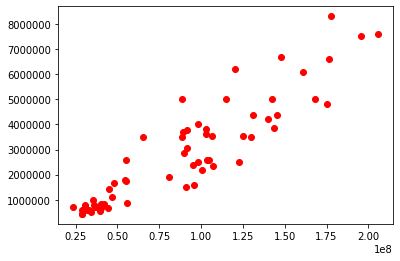

In [215]:
plt.scatter(Xrev, yrev, color = 'red') 


In [220]:
export_graphviz(clf_model, out_file ='tree.dot', 
               feature_names =['Conference','StadSize','total_rev','FGR18','GSR18','W18','L18'])  

In [218]:
Coaches.columns

Index(['School', 'Conference', 'SchoolPay', 'TotalPay', 'StadSize',
       'total_rev', 'FGR18', 'GSR18', 'W18', 'L18', 'runiform'],
      dtype='object')

In [221]:
type(clf_model)

sklearn.tree.tree.DecisionTreeRegressor

In [224]:
tree.export_graphviz(clf_model) 

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 17.913\\nmse = 0.729\\nsamples = 63\\nvalue = 14.54"] ;\n1 [label="X[2] <= 17.613\\nmse = 0.204\\nsamples = 25\\nvalue = 13.632"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[1] <= 10.205\\nmse = 0.047\\nsamples = 18\\nvalue = 13.399"] ;\n1 -> 2 ;\n3 [label="X[1] <= 10.021\\nmse = 0.041\\nsamples = 7\\nvalue = 13.23"] ;\n2 -> 3 ;\n4 [label="X[1] <= 10.012\\nmse = 0.01\\nsamples = 2\\nvalue = 13.492"] ;\n3 -> 4 ;\n5 [label="mse = 0.0\\nsamples = 1\\nvalue = 13.592"] ;\n4 -> 5 ;\n6 [label="mse = -0.0\\nsamples = 1\\nvalue = 13.392"] ;\n4 -> 6 ;\n7 [label="X[3] <= 65.0\\nmse = 0.015\\nsamples = 5\\nvalue = 13.125"] ;\n3 -> 7 ;\n8 [label="mse = 0.004\\nsamples = 3\\nvalue = 13.034"] ;\n7 -> 8 ;\n9 [label="mse = 0.0\\nsamples = 2\\nvalue = 13.261"] ;\n7 -> 9 ;\n10 [label="X[6] <= 8.0\\nmse = 0.022\\nsamples = 11\\nvalue = 13.507"] ;\n2 -> 10 ;\n11 [label="X[6] <= 6.5\\nmse = 0.014\\nsamples = 6\\nvalue =

[Text(163.0706896551724, 199.32, 'X[2] <= 17.913\nmse = 0.729\nsamples = 63\nvalue = 14.54'),
 Text(83.7, 163.07999999999998, 'X[2] <= 17.613\nmse = 0.204\nsamples = 25\nvalue = 13.632'),
 Text(46.179310344827584, 126.83999999999999, 'X[1] <= 10.205\nmse = 0.047\nsamples = 18\nvalue = 13.399'),
 Text(23.089655172413792, 90.6, 'X[1] <= 10.021\nmse = 0.041\nsamples = 7\nvalue = 13.23'),
 Text(11.544827586206896, 54.359999999999985, 'X[1] <= 10.012\nmse = 0.01\nsamples = 2\nvalue = 13.492'),
 Text(5.772413793103448, 18.119999999999976, 'mse = 0.0\nsamples = 1\nvalue = 13.592'),
 Text(17.317241379310346, 18.119999999999976, 'mse = -0.0\nsamples = 1\nvalue = 13.392'),
 Text(34.63448275862069, 54.359999999999985, 'X[3] <= 65.0\nmse = 0.015\nsamples = 5\nvalue = 13.125'),
 Text(28.86206896551724, 18.119999999999976, 'mse = 0.004\nsamples = 3\nvalue = 13.034'),
 Text(40.40689655172414, 18.119999999999976, 'mse = 0.0\nsamples = 2\nvalue = 13.261'),
 Text(69.26896551724138, 90.6, 'X[6] <= 8.0\nm

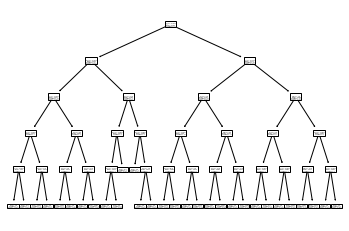

In [225]:
tree.plot_tree(clf_model)  

In [241]:

columns=list(X_train.columns)
dot_data = tree.export_graphviz(clf_model,out_file=None,feature_names=columns,class_names=True)

#graph.render("image",view=True)
#f = open("classifiers/classifier.txt","w+")
#f.write(dot_data)
#f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'digraph Tree {\nnode [shape=box] ;\n0 [label="total_rev <= 17.913\\nmse = 0.729\\nsamples = 63\\nvalue = 14.54"] ;\n1 [label="total_rev <= 17.613\\nmse = 0.204\\nsamples = 25\\nvalue = 13.632"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="StadSize <= 10.205\\nmse = 0.047\\nsamples = 18\\nvalue = 13.399"] ;\n1 -> 2 ;\n3 [label="StadSize <= 10.021\\nmse = 0.041\\nsamples = 7\\nvalue = 13.23"] ;\n2 -> 3 ;\n4 [label="StadSize <= 10.012\\nmse = 0.01\\nsamples = 2\\nvalue = 13.492"] ;\n3 -> 4 ;\n5 [label="mse = 0.0\\nsamples = 1\\nvalue = 13.592"] ;\n4 -> 5 ;\n6 [label="mse = -0.0\\nsamples = 1\\nvalue = 13.392"] ;\n4 -> 6 ;\n7 [label="FGR18 <= 65.0\\nmse = 0.015\\nsamples = 5\\nvalue = 13.125"] ;\n3 -> 7 ;\n8 [label="mse = 0.004\\nsamples = 3\\nvalue = 13.034"] ;\n7 -> 8 ;\n9 [label="mse = 0.0\\nsamples = 2\\nvalue = 13.261"] ;\n7 -> 9 ;\n10 [label="L18 <= 8.0\\nmse = 0.022\\nsamples = 11\\nvalue = 13.507"] ;\n2 -> 10 ;\n11 [label="L18 <= 6.5\\nmse = 0.014\\nsamples = 6\\nvalue = 13.585"] ;\n10 -> 11 ;\n12 [label="mse = 0.004\\nsamples = 5\\nvalue = 13.539"] ;\n11 -> 12 ;\n13 [label="mse = 0.0\\nsamples = 1\\nvalue = 13.816"] ;\n11 -> 13 ;\n14 [label="GSR18 <= 62.5\\nmse = 0.015\\nsamples = 5\\nvalue = 13.413"] ;\n10 -> 14 ;\n15 [label="mse = 0.0\\nsamples = 1\\nvalue = 13.62"] ;\n14 -> 15 ;\n16 [label="mse = 0.005\\nsamples = 4\\nvalue = 13.361"] ;\n14 -> 16 ;\n17 [label="FGR18 <= 64.0\\nmse = 0.109\\nsamples = 7\\nvalue = 14.231"] ;\n1 -> 17 ;\n18 [label="StadSize <= 10.834\\nmse = 0.048\\nsamples = 4\\nvalue = 14.427"] ;\n17 -> 18 ;\n19 [label="StadSize <= 10.439\\nmse = 0.012\\nsamples = 3\\nvalue = 14.313"] ;\n18 -> 19 ;\n20 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.161"] ;\n19 -> 20 ;\n21 [label="mse = 0.0\\nsamples = 2\\nvalue = 14.389"] ;\n19 -> 21 ;\n22 [label="mse = -0.0\\nsamples = 1\\nvalue = 14.771"] ;\n18 -> 22 ;\n23 [label="StadSize <= 10.661\\nmse = 0.069\\nsamples = 3\\nvalue = 13.97"] ;\n17 -> 23 ;\n24 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.316"] ;\n23 -> 24 ;\n25 [label="L18 <= 7.5\\nmse = 0.014\\nsamples = 2\\nvalue = 13.796"] ;\n23 -> 25 ;\n26 [label="mse = 0.0\\nsamples = 1\\nvalue = 13.679"] ;\n25 -> 26 ;\n27 [label="mse = 0.0\\nsamples = 1\\nvalue = 13.913"] ;\n25 -> 27 ;\n28 [label="StadSize <= 11.199\\nmse = 0.176\\nsamples = 38\\nvalue = 15.137"] ;\n0 -> 28 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n29 [label="Conference <= 5.0\\nmse = 0.102\\nsamples = 24\\nvalue = 14.913"] ;\n28 -> 29 ;\n30 [label="StadSize <= 10.935\\nmse = 0.06\\nsamples = 14\\nvalue = 15.028"] ;\n29 -> 30 ;\n31 [label="GSR18 <= 85.5\\nmse = 0.026\\nsamples = 6\\nvalue = 14.802"] ;\n30 -> 31 ;\n32 [label="mse = 0.004\\nsamples = 4\\nvalue = 14.698"] ;\n31 -> 32 ;\n33 [label="mse = 0.006\\nsamples = 2\\nvalue = 15.008"] ;\n31 -> 33 ;\n34 [label="L18 <= 5.5\\nmse = 0.019\\nsamples = 8\\nvalue = 15.197"] ;\n30 -> 34 ;\n35 [label="mse = 0.0\\nsamples = 3\\nvalue = 15.083"] ;\n34 -> 35 ;\n36 [label="mse = 0.018\\nsamples = 5\\nvalue = 15.265"] ;\n34 -> 36 ;\n37 [label="W18 <= 8.5\\nmse = 0.116\\nsamples = 10\\nvalue = 14.752"] ;\n29 -> 37 ;\n38 [label="GSR18 <= 79.5\\nmse = 0.059\\nsamples = 6\\nvalue = 14.546"] ;\n37 -> 38 ;\n39 [label="mse = 0.01\\nsamples = 3\\nvalue = 14.321"] ;\n38 -> 39 ;\n40 [label="mse = 0.007\\nsamples = 3\\nvalue = 14.771"] ;\n38 -> 40 ;\n41 [label="GSR18 <= 73.0\\nmse = 0.042\\nsamples = 4\\nvalue = 15.06"] ;\n37 -> 41 ;\n42 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.732"] ;\n41 -> 42 ;\n43 [label="mse = 0.009\\nsamples = 3\\nvalue = 15.169"] ;\n41 -> 43 ;\n44 [label="W18 <= 7.5\\nmse = 0.069\\nsamples = 14\\nvalue = 15.521"] ;\n28 -> 44 ;\n45 [label="Conference <= 5.5\\nmse = 0.017\\nsamples = 6\\nvalue = 15.271"] ;\n44 -> 45 ;\n46 [label="StadSize <= 11.255\\nmse = 0.004\\nsamples = 3\\nvalue = 15.382"] ;\n45 -> 46 ;\n47 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.295"] ;\n46 -> 47 ;\n48 [label="mse = -0.0\\nsamples = 2\\nvalue = 15.425"] ;\n46 -> 48 ;\n49 [label="StadSize <= 11.291\\nmse = 0.006\\nsamples = 3\\nvalue = 15.16"] ;\n45 -> 49 ;\n50 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.068"] ;\n49 -> 50 ;\n51 [label="mse = 0.002\\nsamples = 2\\nvalue = 15.207"] ;\n49 -> 51 ;\n52 [label="total_rev <= 18.992\\nmse = 0.025\\nsamples = 8\\nvalue = 15.709"] ;\n44 -> 52 ;\n53 [label="W18 <= 11.5\\nmse = 0.014\\nsamples = 5\\nvalue = 15.613"] ;\n52 -> 53 ;\n54 [label="mse = 0.002\\nsamples = 3\\nvalue = 15.68"] ;\n53 -> 54 ;\n55 [label="mse = 0.016\\nsamples = 2\\nvalue = 15.512"] ;\n53 -> 55 ;\n56 [label="total_rev <= 19.043\\nmse = 0.002\\nsamples = 3\\nvalue = 15.869"] ;\n52 -> 56 ;\n57 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.933"] ;\n56 -> 57 ;\n58 [label="mse = 0.0\\nsamples = 2\\nvalue = 15.837"] ;\n56 -> 58 ;\n}'

In [249]:
graph = pydotplus.graph_from_dot_data(dot_data)

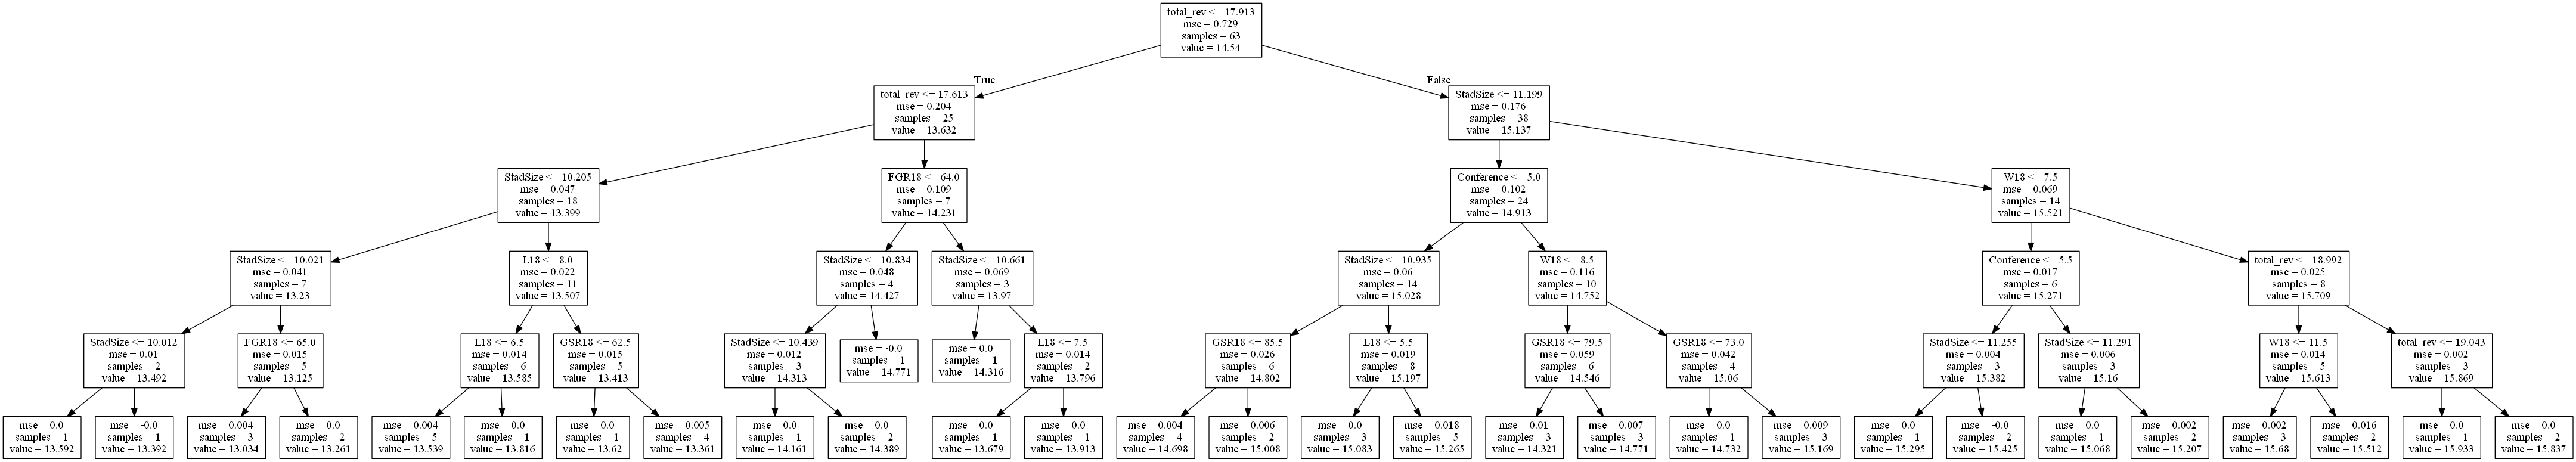

In [254]:
Image(graph.create_png())